In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [2]:
def euler(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Euler.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    return x + dt*f(x,t,p)

In [3]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [4]:
def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

# Ejercicio 1:

Considere la Ecuación Diferencial Ordinaria (ODE) 

$$\dot{x}=-a x + b$$

donde $a,b>0$.

1. Encuentre el/los puntos fijos.

2. Determine la estabilidad lineal de el/los mismo/s.

3. Use el método de integración de Runge Kutta de orden 4 para calcular la trayectoria de la solución $x(0)=1$ usando $k=20$ pasos de integración en $t\in [0,5]$ para $a=2$ y $b=3$.

4. Grafique la trayectoria $x(t)$. Compare con la solución exacta de condicion inicial $x(0)=x_0$:
\begin{eqnarray}
x(t) &=& \bigg(x_0-\frac{b}{a}\bigg)e^{-at}+\frac{b}{a} \\
\end{eqnarray}

5. Grafique $\dot{x}$ vs $x$. Incluya:

    a. Los puntos fijos, en blanco si son inestables, en negro si son estables y en rojo si son linealmente marginales.
    
    b. En gris a rayas, la linea $\dot{x}=0$ para todo $x$.
    
    c. En azul, flechas que indiquen la dirección de cambio en cada región entre puntos fijos, incluyendo los puntos $x = \pm \infty$.

# Ejercicio 2:

La ecuación logística es

$$\dot{N} = rN\bigg(1-\frac{N}{K}\bigg)$$

donde $r>0$ representa una taza de reproducción y $K>0$ una capacidad de carga.

1. Determine los puntos fijos.

2. Determine la estabilidad de los puntos fijos.

3. Utilice el integrador de Runge Kutta de orden 4 para calcular y graficar usando $k=100$ pasos de integración en $t\in [0,5]$ para $r=1$, $K=1$ y: 

    a. $N(0)=0.1K$
    
    b. $N(0)=0.7K$ 
    
    c. $N(0)=1.2K$

4. Grafique con lineas punteadas la solución exacta en donde la condición inicial viene dada por $N(0)=Kx_0$:
$$x(t) = \frac{\frac{x_0}{1-x_0}e^{rt}}{1+\frac{x_0}{1-x_0}e^{rt}}$$

5. Repita 2.3 y 2.4 para $r=0.25$ y $r=4$.

6. Discuta lo observado hasta el momento.

7. Grafique $\dot{x}=f(x)$ vs $x$ para $x\in [0,1.25]$, $r=1$ y $K=1$. Incluya:

    a. Los puntos fijos, en blanco los linealmente inestables, en negro los linealmente estables y en amarillo los linealmente marginales.
    
    b. Con una línea punteada gris, la curva $\dot{x}=0$.
    
    c. Flechas azules que indiquen la dirección de la velocidad.
    
    d. En verde, el punto de máxima velocidad.

8. Observe en los puntos 2.3 y 2.5 que la curva del caso b. presenta un cambio de concavidad y mientras que la curva del caso a. no lo hace. Use el gráfico del punto 2.7 para explicar lo que ocurre.

-------------
# Soluciones

---------------
## Ejercicio 1

1. Los puntos fijos son aquellos donde $f(x)=-ax+b$ se anula, o sea $x^*=\frac{b}{a}$ 

2. Debemos ver el signo de $f'(x)$ evaluada en el punto fijo de la ecuación. Tenemos 
$$
f'(x)=-a\implies\:f'\bigg(\frac{b}{a}\bigg)=-a<0
$$
Luego el punto fijo $x^*$ es un punto estable. 

3.

In [5]:
m=rk4
a=float(2)
b=float(3)
x0=[1]
k=int(20)
ti=float(0)
tf=float(5)
p=float(0)

def f(x,t,p):
    return -a*x+b

t_aprox, x_aprox = integrador_ode(m,f,x0,ti,tf,k,p)

4. 

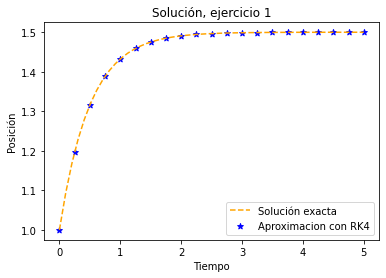

In [6]:
def x(t):
    return (1-3/2)*np.exp(-2*t)+3/2
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Solución, ejercicio 1")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.scatter(t_aprox,x_aprox,label="Aproximacion con RK4",color="blue",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="orange",linestyle="--")
plt.legend()

5.

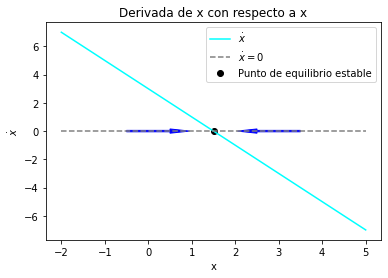

In [7]:
def dx(x):
    return -2*x+3

x= np.linspace(-2,5,100)
plt.title("Derivada de x con respecto a x")
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
#plt.grid(True)
plt.plot(x,dx(x),color="cyan",linestyle="solid",label=r'$\dot{x}$')
plt.plot(x,np.zeros(100), color="grey", linestyle="dashed",label=r"$\dot{x}=0$")
plt.scatter(3/2,0,color="black", marker="o", edgecolors="black", linewidth=1,label="Punto de equilibrio estable")
plt.arrow(-0.5,0,1,0, width=0.1,ec="blue", fc="blue")
plt.arrow(3.5,0,-1,0, width=0.1, ec="blue", fc="blue") 
plt.legend()

----------------
## Ejercicio 2 

1. La ecuación tiene dos puntos fijos: para $N^*=0$ y para $N^{**}=K$ tenemos que $\dot{N}=0$

2. Tenemos que 
$$
f(N)=rN\bigg(1-\frac{N}{K}\bigg)\:\implies\:f'(N)=r\bigg(1-\frac{2N}{K}\bigg)
$$
Tenemos por lo tanto que 
$$
f'(N^*)=f'(0)=r\:>0\\
f'(N^{**})=f'(K)=-r\:<0
$$

Luego, $N^*$ es un punto de equilibrio inestable y $N^{**}$ es un punto de equilibrio estable.

3. a)  $\:r=1$, $K=1$, $N(0)=0.1K\implies\:N(0)=0.1$

In [8]:
m=rk4
r=float(1)
K=float(1)
N0=[0.1]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

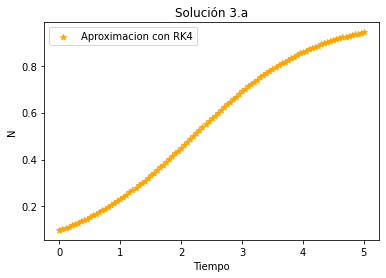

In [9]:
plt.title("Solución 3.a")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.legend()

3. b) $\:r=1$, $K=1$, $N(0)=0.7K\implies\:N(0)=0.7$

In [10]:
m=rk4
r=float(1)
K=float(1)
N0=[0.7]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

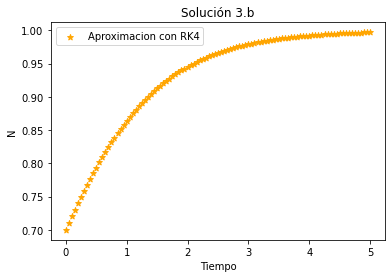

In [11]:
plt.title("Solución 3.b")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.legend()

3. c) $\:r=1$, $K=1$, $N(0)=1.2K\implies\:N(0)=1.2$

In [12]:
m=rk4
r=float(1)
K=float(1)
N0=[1.2]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

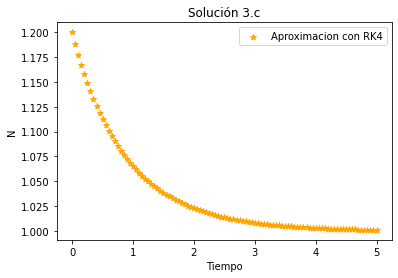

In [13]:
plt.title("Solución 3.c")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.legend()

4. $N(0)=Kx_0$:
$$x(t) = \frac{\frac{x_0}{1-x_0}e^{rt}}{1+\frac{x_0}{1-x_0}e^{rt}}$$

$$\hspace{1.5cm}(a)\:x_0=0.1\\\implies\:(b)\:x_0=0.7\\\hspace{1.5cm}(c)\:x=1.2$$

$$\hspace{1.5cm}(a)\:x(t) = \frac{\frac{e^{rt}}{9}}{1+\frac{e^{rt}}{9}}\\\implies\:(b)\:x(t) = \frac{\frac{7}{3}e^{rt}}{1+\frac{7}{3}e^{rt}}\\\hspace{1.5cm}(c)\:x(t) = \frac{-6e^{rt}}{1-6e^{rt}}$$

4. a)

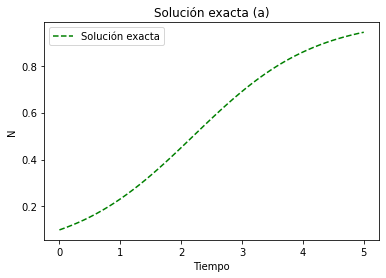

In [14]:
def x(t):
    return ((1/9)*np.exp(t))/(1+(1/9)*np.exp(t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Solución exacta (a)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

4. (b)

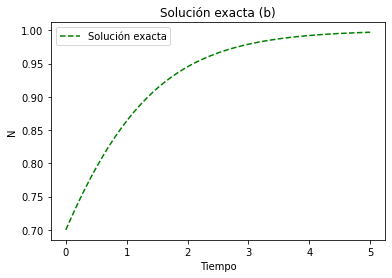

In [15]:
def x(t):
    return ((7/3)*np.exp(t))/(1+(7/3)*np.exp(t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Solución exacta (b)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

4. (c)

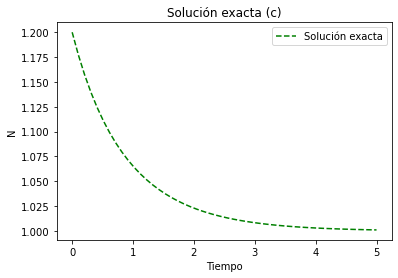

In [16]:
def x(t):
    return (-6*np.exp(t))/(1-6*np.exp(t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Solución exacta (c)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

5. Para $r=0.25$ 
- a) $\:r=0.25$, $K=1$, $N(0)=0.1K\implies\:N(0)=0.1$

In [17]:
m=rk4
r=float(0.25)
K=float(1)
N0=[0.1]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

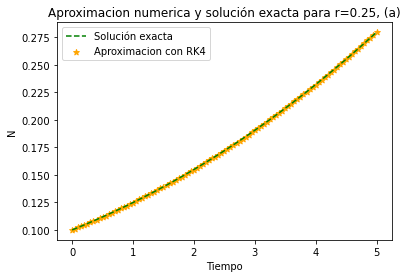

In [18]:
def x(t):
    return ((1/9)*np.exp(0.25*t))/(1+(1/9)*np.exp(0.25*t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Aproximacion numerica y solución exacta para r=0.25, (a)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

- b) $\:r=0.25$, $K=1$, $N(0)=0.7K\implies\:N(0)=0.7$

In [19]:
m=rk4
r=float(0.25)
K=float(1)
N0=[0.7]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

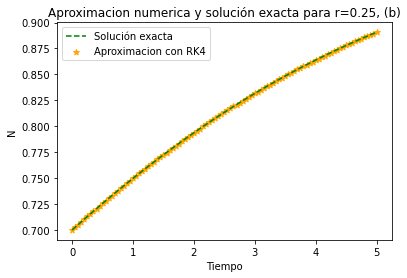

In [20]:
def x(t):
    return ((7/3)*np.exp(0.25*t))/(1+(7/3)*np.exp(0.25*t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Aproximacion numerica y solución exacta para r=0.25, (b)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

- c) $\:r=0.25$, $K=1$, $N(0)=1.2K\implies\:N(0)=1.2$

In [21]:
m=rk4
r=float(0.25)
K=float(1)
N0=[1.2]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

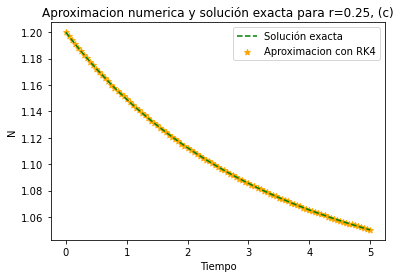

In [22]:
def x(t):
    return (-6*np.exp(0.25*t))/(1-6*np.exp(0.25*t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Aproximacion numerica y solución exacta para r=0.25, (c)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

Para $r=4$
- a) $\:r=4$, $K=1$, $N(0)=0.1K\implies\:N(0)=0.1$

In [23]:
m=rk4
r=float(4)
K=float(1)
N0=[0.1]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

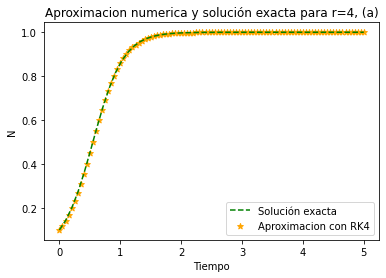

In [24]:
def x(t):
    return ((1/9)*np.exp(4*t))/(1+(1/9)*np.exp(4*t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Aproximacion numerica y solución exacta para r=4, (a)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

- b) $\:r=4$, $K=1$, $N(0)=0.7K\implies\:N(0)=0.7$

In [25]:
m=rk4
r=float(4)
K=float(1)
N0=[0.7]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

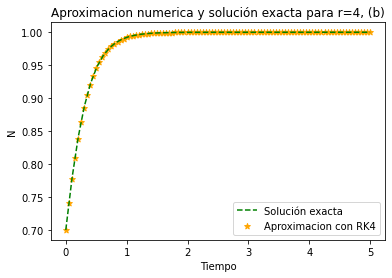

In [26]:
def x(t):
    return ((7/3)*np.exp(4*t))/(1+(7/3)*np.exp(4*t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Aproximacion numerica y solución exacta para r=4, (b)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

- c) $\:r=4$, $K=1$, $N(0)=1.2K\implies\:N(0)=1.2$

In [27]:
m=rk4
r=float(4)
K=float(1)
N0=[1.2]
k=int(100)
a=float(0)
b=float(5)
p=float(0)

def f(N,t,p):
    return r*N*(1-(N/K))

t_aprox, N_aprox = integrador_ode(m,f,N0,a,b,k,p)

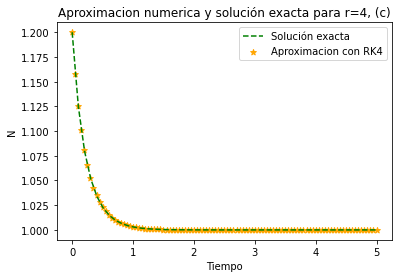

In [28]:
def x(t):
    return (-6*np.exp(4*t))/(1-6*np.exp(4*t))
t=np.linspace(0,5,50)
#x_sol=x(t)
plt.title("Aproximacion numerica y solución exacta para r=4, (c)")
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.scatter(t_aprox,N_aprox,label="Aproximacion con RK4",color="orange",marker="*")
plt.plot(t,x(t),label="Solución exacta",color="green",linestyle="dashed")
plt.legend()

6.


7. 

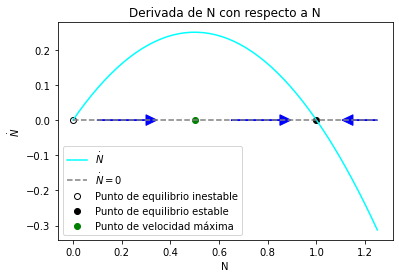

In [29]:
def dx(x):
    return x*(1-x)

x= np.linspace(0,1.25,50)
plt.title("Derivada de N con respecto a N")
plt.xlabel("N")
plt.ylabel(r"$\dot{N}$")
#plt.grid(True)
plt.plot(x,dx(x),color="cyan",linestyle="solid",label=r'$\dot{N}$')
plt.plot(x,np.zeros(50), color="grey", linestyle="dashed",label=r"$\dot{N}=0$")
plt.scatter(0,0,color="white", marker="o", edgecolors="black", linewidth=1,label="Punto de equilibrio inestable")
plt.scatter(1,0,color="black", marker="o", edgecolors="black", linewidth=1,label="Punto de equilibrio estable")
plt.scatter(0.5,0,color="green", marker="o", edgecolors="green", linewidth=1,label="Punto de velocidad máxima")
plt.arrow(0.65,0,0.20,0, width=0.001, head_width=0.03, ec="blue", fc="blue")
plt.arrow(0.1,0,0.20,0, width=0.001, head_width=0.03, ec="blue", fc="blue")
plt.arrow(1.25,0,-0.1,0, width=0.001, head_width=0.03, ec="blue", fc="blue") 
plt.legend()